<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/EDA_casestudy_Thasliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_excel('/content/Sample - Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Univariate

sales

In [27]:
data["Sales"].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


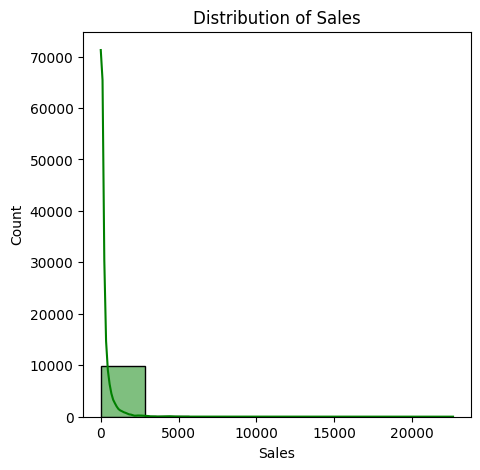

In [28]:
#Histogram of sales
plt.figure(figsize=(5,5))
sns.histplot(data["Sales"], bins=8, color='green',edgecolor='black',kde=True)
plt.title("Distribution of Sales")
plt.show()

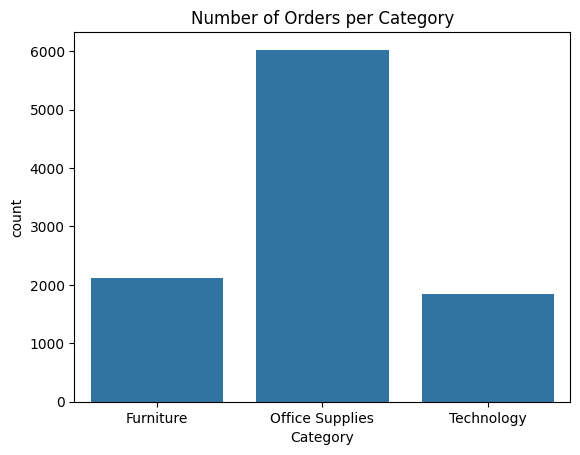

In [29]:
# Count plot of Category
sns.countplot(data, x='Category')
plt.title('Number of Orders per Category')
plt.show()

In [30]:
#sort by sales
top_sales = data.sort_values(by="Sales", ascending=False)
top_sales[["Order ID", "Category", "Sales", "Profit"]]

,Order ID,Category,Sales,Profit
2697,CA-2015-145317,Technology,22638.480,-1811.0784
6826,CA-2017-118689,Technology,17499.950,8399.9760
8153,CA-2018-140151,Technology,13999.960,6719.9808
2623,CA-2018-127180,Technology,11199.968,3919.9888
4190,CA-2018-166709,Technology,10499.970,5039.9856
...,...,...,...,...
2106,US-2015-152723,Office Supplies,0.876,-1.4016
4711,CA-2015-112403,Office Supplies,0.852,-0.5964
8658,CA-2017-168361,Office Supplies,0.836,-1.3376
9292,CA-2018-124114,Office Supplies,0.556,-0.9452


# Bivariate

sales, profit

region,sales

region,profit

discount,profit

discount,sales



In [31]:
correlation = data[["Sales", "Profit"]].corr()
correlation

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


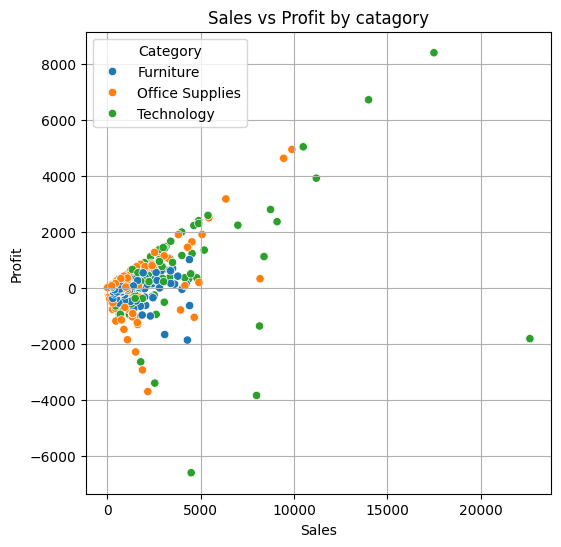

In [32]:
# Scatter plot of Sales vs Profit
plt.figure(figsize=(6,6))
sns.scatterplot(data, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit by catagory")
plt.grid(True)
plt.show()

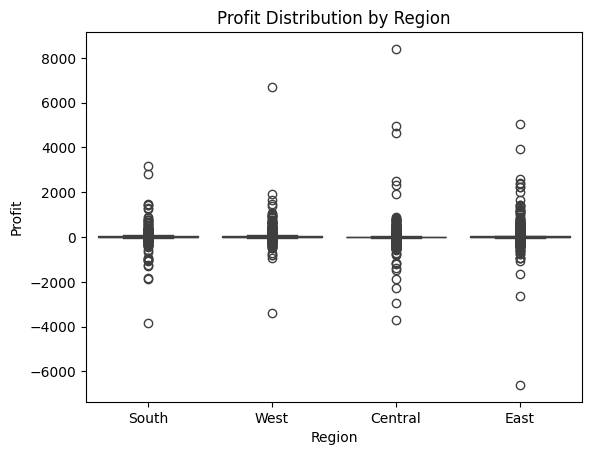

In [33]:
# Boxplot of Profit by Region
sns.boxplot(data, x='Region', y='Profit')
plt.title('Profit Distribution by Region')
plt.show()

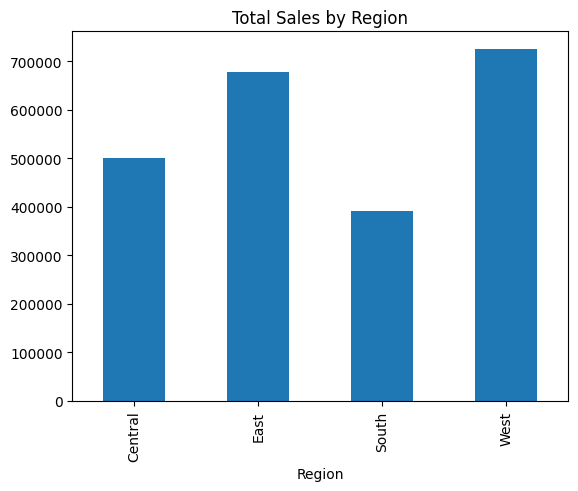

In [34]:
# Bar plot of total Sales by Region
data.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Region')
plt.show()

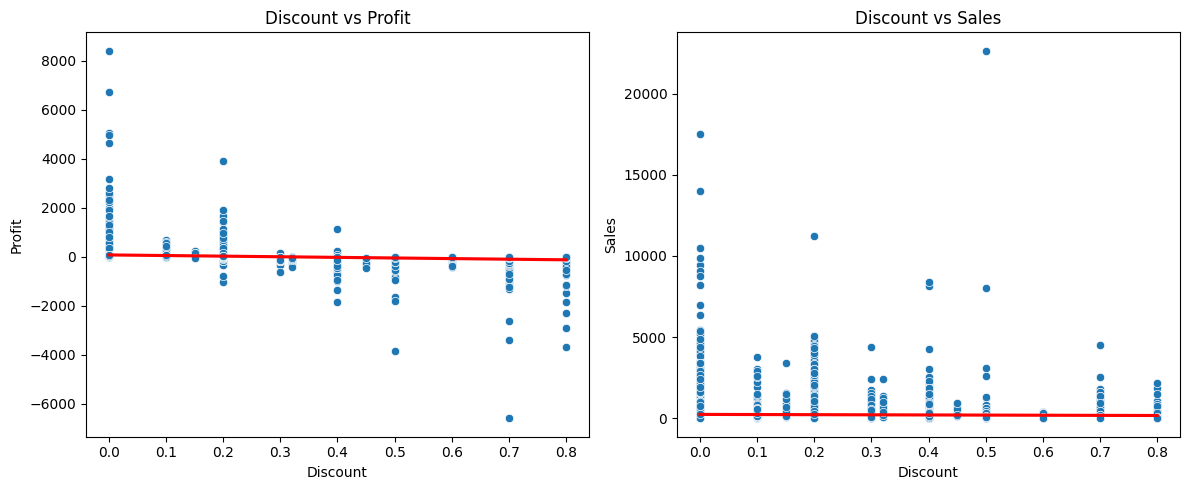

In [35]:
# Scatter plot of Discount vs Profit
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data, x='Discount', y='Profit')
sns.regplot(data, x='Discount', y='Profit', scatter=False, color='red')
plt.title('Discount vs Profit')


# Scatter plot of Discount vs Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data, x='Discount', y='Sales')
sns.regplot(data, x='Discount', y='Sales', scatter=False, color='red')
plt.title('Discount vs Sales')


plt.tight_layout()
plt.show()

In [36]:
# Sort by Profit
top_profit = data.sort_values(by="Profit", ascending=False)
top_profit[["Order ID", "Category", "Sales", "Profit"]]

,Order ID,Category,Sales,Profit
6826,CA-2017-118689,Technology,17499.950,8399.9760
8153,CA-2018-140151,Technology,13999.960,6719.9808
4190,CA-2018-166709,Technology,10499.970,5039.9856
9039,CA-2017-117121,Office Supplies,9892.740,4946.3700
4098,CA-2015-116904,Office Supplies,9449.950,4630.4755
...,...,...,...,...
4991,US-2018-122714,Office Supplies,1889.990,-2929.4845
3011,CA-2018-134845,Technology,2549.985,-3399.9800
9774,CA-2015-169019,Office Supplies,2177.584,-3701.8928
683,US-2018-168116,Technology,7999.980,-3839.9904


# Multivariate

sales, profit, discount, quantity

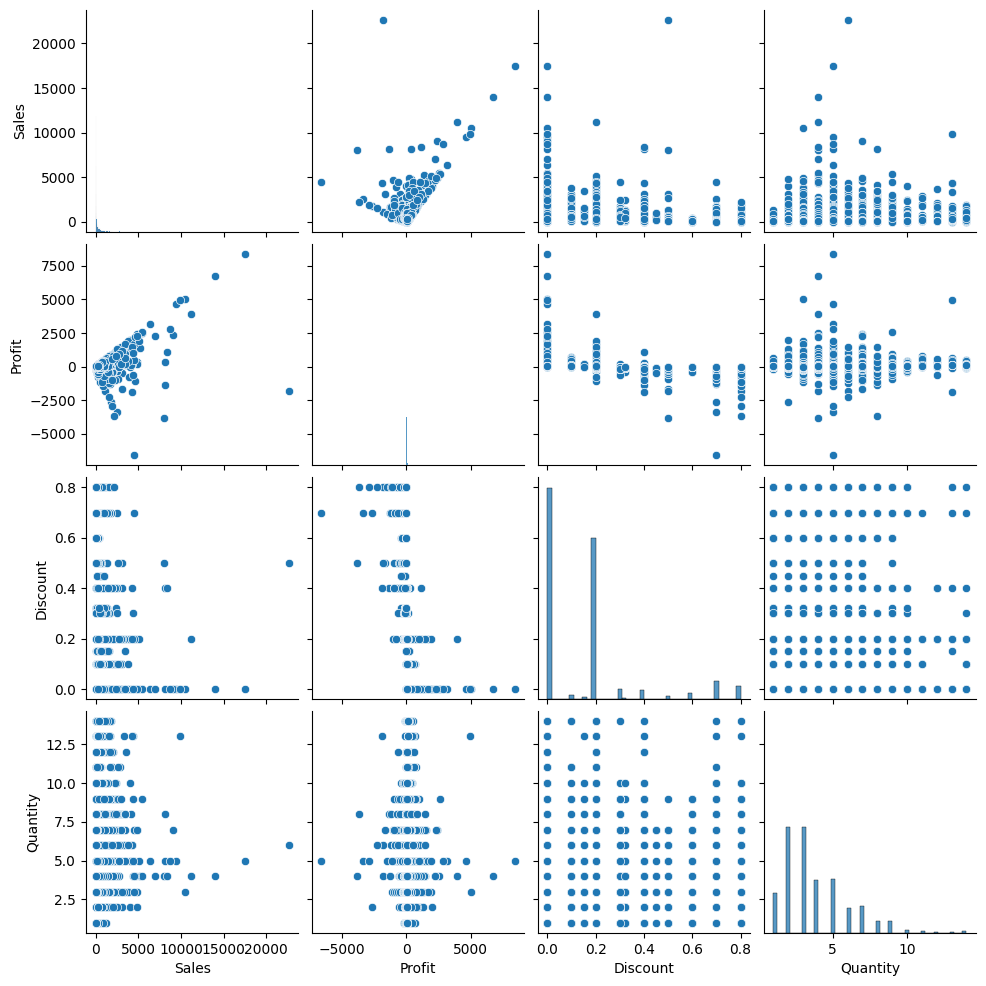

In [37]:
#pairplot
sns.pairplot(data[["Sales", "Profit", "Discount", "Quantity"]])
plt.show()

In [38]:
num_cols = data[["Sales", "Profit", "Discount", "Quantity"]].select_dtypes(include=['number'])
corr = num_cols.corr()
corr

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


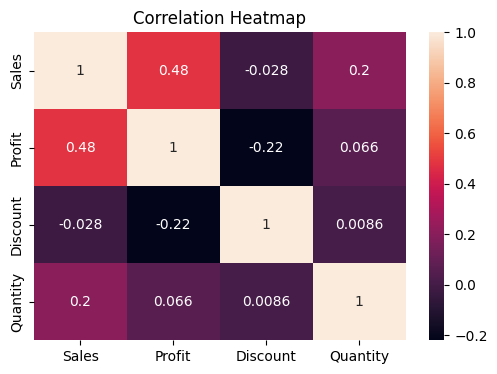

In [39]:
# Heatmap of correlation between numerical variables
plt.figure(figsize=(6,4))
sns.heatmap(data[["Sales", "Profit", "Discount", "Quantity"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# Grouped summary by Category & Region
grouped = data.groupby(["Category", "Region"])[["Sales", "Profit"]].sum().sort_values(by="Sales",
                                                                                      ascending=False)
print("\nGrouped Sales & Profit (sorted by Sales):")
grouped


Grouped Sales & Profit (sorted by Sales):


,,Sales,Profit
Category,Region,,
Technology,East,264973.9810,47462.0351
Furniture,West,252612.7435,11504.9503
Technology,West,251991.8320,44303.6496
Office Supplies,West,220853.2490,52609.8490
Furniture,East,208291.2040,3046.1658
Office Supplies,East,205516.0550,41014.5791
Technology,Central,170416.3120,33697.4320
Office Supplies,Central,167026.4150,8879.9799
Furniture,Central,163797.1638,-2871.0494


/tmp/ipython-input-528558007.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_profit_over_time = data.resample('M', on='Order Date')[['Sales', 'Profit']].sum()


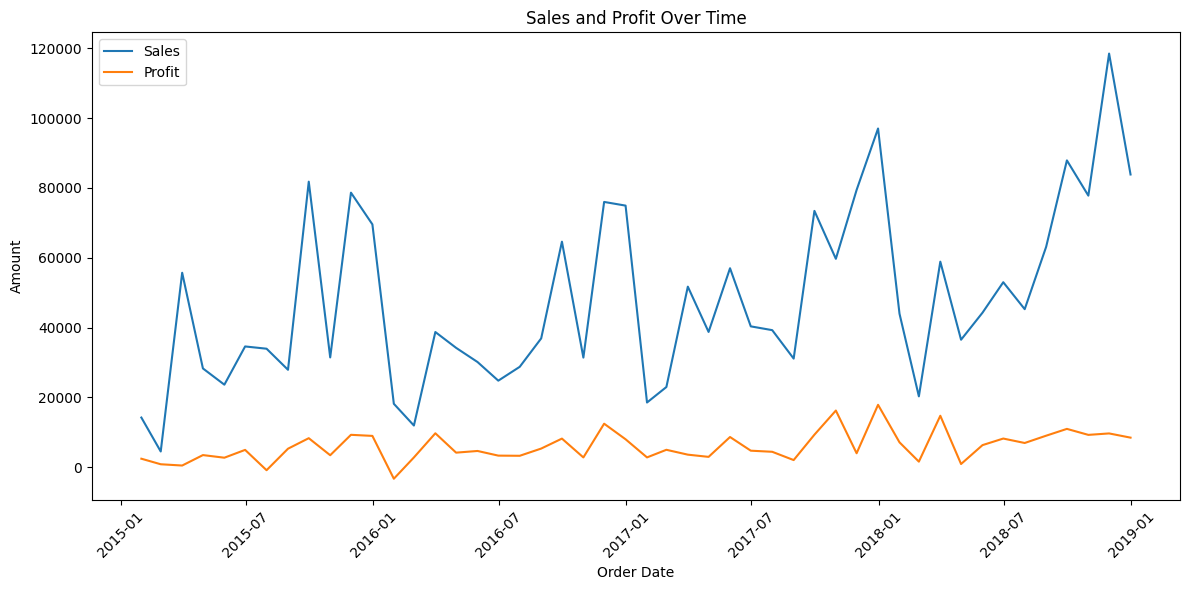

In [41]:
# Group by month or date depending on the data size
sales_profit_over_time = data.resample('M', on='Order Date')[['Sales', 'Profit']].sum()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_profit_over_time, x=sales_profit_over_time.index, y='Sales', label='Sales')
sns.lineplot(data=sales_profit_over_time, x=sales_profit_over_time.index, y='Profit', label='Profit')

plt.title('Sales and Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()